# Bike Sharing Assignment (PGDS - C28)

### By SEYED JAVIDH
#### Roll Number - DDS21010136

### IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

### READING DATAFRAME

In [2]:
df = pd.read_csv('day.csv', index_col='instant')

df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### DATAFRAME INSPECTION

In [3]:
#CHECKING NUMBER OF ROWS AND COLUMNS

df.shape

(730, 15)

In [4]:
#CHECKING ALL NUMERIC COLUMNS

df.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [5]:
#CHECKING DESCRIPTIVE INFORMATION OF ALL COLUMNS

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 1 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      730 non-null    object 
 1   season      730 non-null    int64  
 2   yr          730 non-null    int64  
 3   mnth        730 non-null    int64  
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    int64  
 6   workingday  730 non-null    int64  
 7   weathersit  730 non-null    int64  
 8   temp        730 non-null    float64
 9   atemp       730 non-null    float64
 10  hum         730 non-null    float64
 11  windspeed   730 non-null    float64
 12  casual      730 non-null    int64  
 13  registered  730 non-null    int64  
 14  cnt         730 non-null    int64  
dtypes: float64(4), int64(10), object(1)
memory usage: 91.2+ KB


In [6]:
#CHECKING NULL VALUES

df.isnull().sum()

dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

**`INFERENCE`** -
 - No columns has null values

## DATA CLEANING

In [7]:
#DROPPING DUPLICATE RECORDS 

df.drop_duplicates(subset=None, inplace=True)

df.shape

(730, 15)

**`INFERENCE`** -
 - No duplicate records are in the dataframe

In [8]:
#DROPPING UNWANTED COLUMNS
#dropping dteday column as it is explained by other columns
#dropping casual and registered columns as the sum of these is cnt(dependent variable)

df.drop(['dteday','casual','registered'],axis=1,inplace=True)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
instant,,,,,,,,,,,,
1,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
2,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
3,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
4,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
5,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [9]:
headers = ['Temperature', 'Adjusted Temperature']
pd.DataFrame(np.corrcoef(df['temp'], df["atemp"]), index=headers, columns=headers) 

,Temperature,Adjusted Temperature
Temperature,1.000000,0.991696
Adjusted Temperature,0.991696,1.000000


- Correlation between these 2 variables is almost 1 so let us drop one column

In [10]:
# DROPPING atemp COLUMN

df.drop(['atemp'],axis=1,inplace=True)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
instant,,,,,,,,,,,
1,1,0,1,0,1,1,2,14.110847,80.5833,10.749882,985
2,1,0,1,0,2,1,2,14.902598,69.6087,16.652113,801
3,1,0,1,0,3,1,1,8.050924,43.7273,16.636703,1349
4,1,0,1,0,4,1,1,8.200000,59.0435,10.739832,1562
5,1,0,1,0,5,1,1,9.305237,43.6957,12.522300,1600


In [11]:
#RECHECKING SHAPE

df.shape

(730, 11)

#### CLEANING CATEGORY VARIABLES WITH APPROPRIATE VALUES

In [12]:
#SEASON COLUMN 

df['season'].replace({1:"spring",2:"summer",3:"fall",4:"winter"},inplace=True)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
instant,,,,,,,,,,,
1,spring,0,1,0,1,1,2,14.110847,80.5833,10.749882,985
2,spring,0,1,0,2,1,2,14.902598,69.6087,16.652113,801
3,spring,0,1,0,3,1,1,8.050924,43.7273,16.636703,1349
4,spring,0,1,0,4,1,1,8.200000,59.0435,10.739832,1562
5,spring,0,1,0,5,1,1,9.305237,43.6957,12.522300,1600


In [13]:
#MNTH COLUMN

df['mnth'].replace({1:"January",2:"February",3:"March",4:"april",5:"May",6:"June",7:"July",
                    8:"August",9:"September",10:"October",11:"November",12:"December"},inplace=True)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
instant,,,,,,,,,,,
1,spring,0,January,0,1,1,2,14.110847,80.5833,10.749882,985
2,spring,0,January,0,2,1,2,14.902598,69.6087,16.652113,801
3,spring,0,January,0,3,1,1,8.050924,43.7273,16.636703,1349
4,spring,0,January,0,4,1,1,8.200000,59.0435,10.739832,1562
5,spring,0,January,0,5,1,1,9.305237,43.6957,12.522300,1600


In [14]:
#WEEKDAY COLUMN

df['weekday'].replace({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thursday",5:"Friday",6:"Saturday"},inplace=True)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
instant,,,,,,,,,,,
1,spring,0,January,0,Monday,1,2,14.110847,80.5833,10.749882,985
2,spring,0,January,0,Tuesday,1,2,14.902598,69.6087,16.652113,801
3,spring,0,January,0,Wednesday,1,1,8.050924,43.7273,16.636703,1349
4,spring,0,January,0,Thursday,1,1,8.200000,59.0435,10.739832,1562
5,spring,0,January,0,Friday,1,1,9.305237,43.6957,12.522300,1600


In [15]:
#WEATHERSIT COLUMN

df['weathersit'].replace({1:"Clear_Few Clouds",2:"Mist_cloudy",3:"Light rain_Light snow_Thunderstorm",
                          4:'Heavy Rain_Ice Pallets_Thunderstorm_Mist'},inplace=True)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
instant,,,,,,,,,,,
1,spring,0,January,0,Monday,1,Mist_cloudy,14.110847,80.5833,10.749882,985
2,spring,0,January,0,Tuesday,1,Mist_cloudy,14.902598,69.6087,16.652113,801
3,spring,0,January,0,Wednesday,1,Clear_Few Clouds,8.050924,43.7273,16.636703,1349
4,spring,0,January,0,Thursday,1,Clear_Few Clouds,8.200000,59.0435,10.739832,1562
5,spring,0,January,0,Friday,1,Clear_Few Clouds,9.305237,43.6957,12.522300,1600


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 1 to 730
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 68.4+ KB


## DATA VISUALIZATION 

##### ANALYSIS ON CATEGORICAL COLUMNS

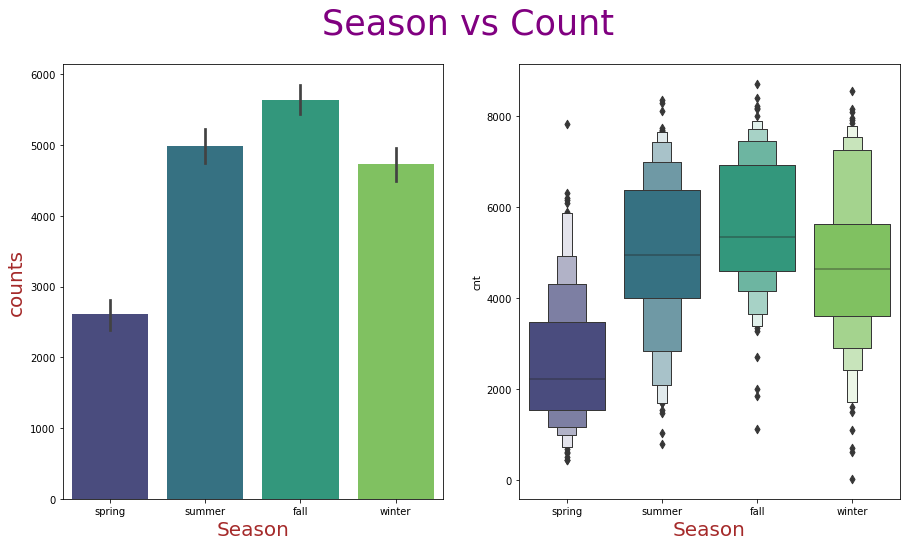

In [17]:
# SEASON VS COUNT

plt.figure(figsize=[15,8])
plt.suptitle('Season vs Count',fontsize = 35, color='Purple' )

plt.subplot(1,2,1)
sns.barplot(x=df.season, y=df.cnt,palette = 'viridis')

plt.xlabel('Season', fontsize = 20,color ='Brown')
plt.ylabel('counts', fontsize = 20,color ='Brown')

plt.subplot(1,2,2)
sns.boxenplot(x = 'season', y = 'cnt', data = df,palette = 'viridis')

plt.xlabel('Season', fontsize = 20,color ='Brown')

plt.show()

**`INFERENCE`** -
 - We can notice a huge difference between fall and spring
 - Counts are very low during spring compared to other seasons
 - This can be a good predictor of dependant variable

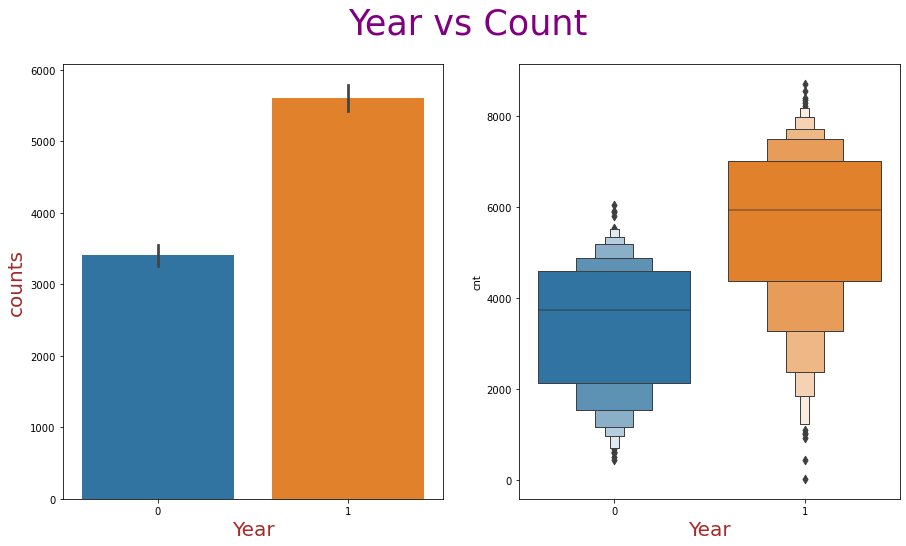

In [18]:
# YEAR VS COUNT

plt.figure(figsize=[15,8])
plt.suptitle('Year vs Count',fontsize = 35, color='Purple' )

plt.subplot(1,2,1)
sns.barplot(x=df.yr, y=df.cnt)

plt.xlabel('Year', fontsize = 20,color ='Brown')
plt.ylabel('counts', fontsize = 20,color ='Brown')

plt.subplot(1,2,2)
sns.boxenplot(x = 'yr', y = 'cnt', data = df)

plt.xlabel('Year', fontsize = 20,color ='Brown')

plt.show()

**`INFERENCE`** -
 - There is a significant increase in 2019 compared to 2018
 - Increase in demand in increase in year can be a good predictor

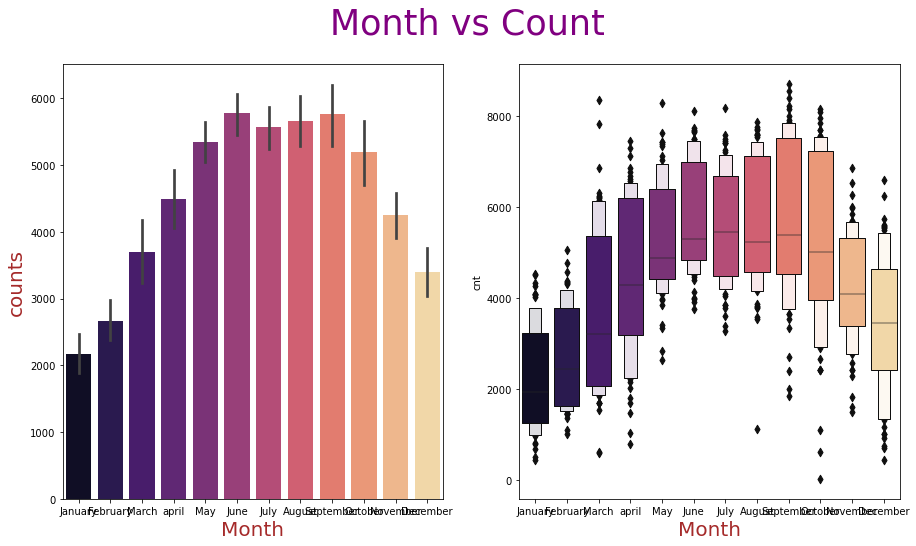

In [19]:
# MONTH VS COUNT

plt.figure(figsize=[15,8])
plt.suptitle('Month vs Count',fontsize = 35, color='Purple' )

plt.subplot(1,2,1)
sns.barplot(x=df.mnth, y=df.cnt, palette='magma')

plt.xlabel('Month', fontsize = 20,color ='Brown')
plt.ylabel('counts', fontsize = 20,color ='Brown')

plt.subplot(1,2,2)
sns.boxenplot(x = 'mnth', y = 'cnt', data = df, palette='magma')

plt.xlabel('Month', fontsize = 20,color ='Brown')

plt.show()

**`INFERENCE`** -
 - Count values are more between may and october
 - very less between november and april, which are winter and spring season in United States of America
 - This can be a good predictor of dependant variable

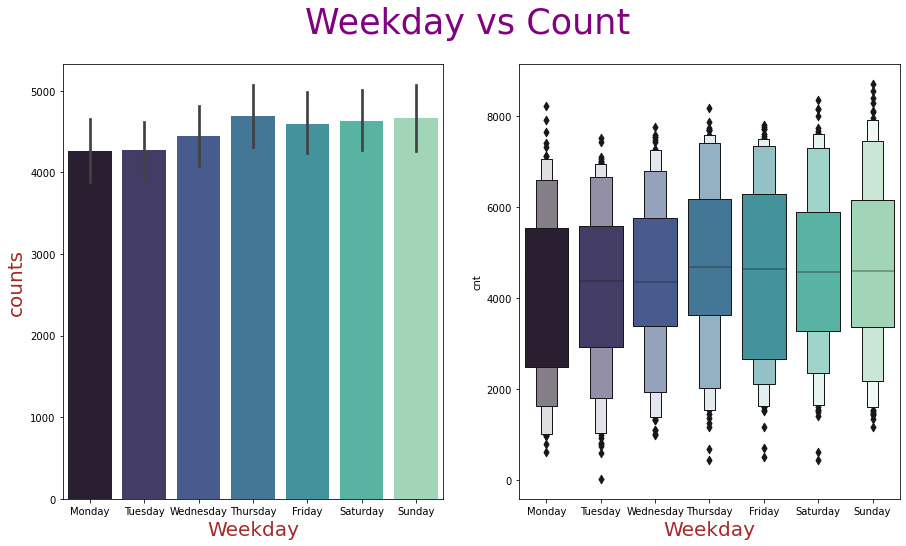

In [20]:
# WEEKDAY VS COUNT

plt.figure(figsize=[15,8])
plt.suptitle('Weekday vs Count',fontsize = 35, color='Purple' )

plt.subplot(1,2,1)
sns.barplot(x=df.weekday, y=df.cnt, palette='mako')

plt.xlabel('Weekday', fontsize = 20,color ='Brown')
plt.ylabel('counts', fontsize = 20,color ='Brown')

plt.subplot(1,2,2)
sns.boxenplot(x = 'weekday', y = 'cnt', data = df, palette='mako')

plt.xlabel('Weekday', fontsize = 20,color ='Brown')

plt.show()

**`INFERENCE`** -
 - Thursdays and Fridays have higher counts than the bigining of the week, as Mondays and Tuesdays have the lowest counts.
 - Friday, Saturday and Sunday almost looks similar. there is no big difference among the days

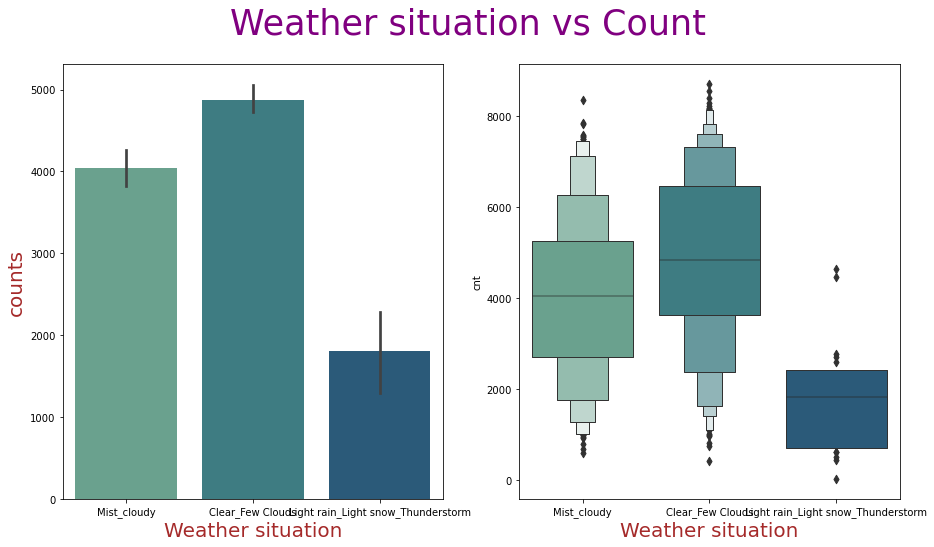

In [21]:
# WEATHER SITUATION DAY VS COUNT

plt.figure(figsize=[15,8])
plt.suptitle('Weather situation vs Count',fontsize = 35, color='Purple' )

plt.subplot(1,2,1)
sns.barplot(x=df.weathersit, y=df.cnt, palette='crest')

plt.xlabel('Weather situation', fontsize = 20,color ='Brown')
plt.ylabel('counts', fontsize = 20,color ='Brown')

plt.subplot(1,2,2)
sns.boxenplot(x = 'weathersit', y = 'cnt', data = df, palette='crest')

plt.xlabel('Weather situation', fontsize = 20,color ='Brown')

plt.show()

**`INFERENCE`** -
 - There is drastic reduction in counts during rain or snow or thunderstorm
 - counts are highest during clear sky
 - This can be a good predictor 

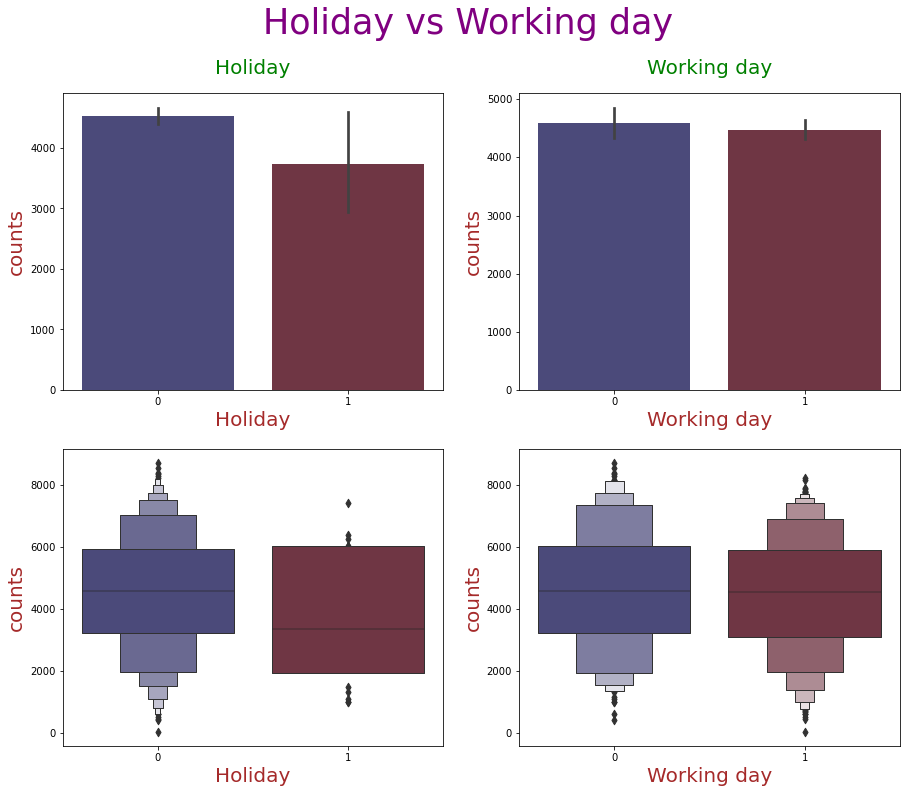

In [22]:
# HOLIDAYS VS WORKING DAYS

plt.figure(figsize=[15,12])
plt.suptitle('Holiday vs Working day',fontsize = 35, color='Purple' )

plt.subplot(2,2,1)
sns.barplot(x=df.holiday, y=df.cnt, palette='icefire').set_title("Holiday", fontsize=20, color='Green', pad=20)

plt.xlabel('Holiday', fontsize = 20,color ='Brown')
plt.ylabel('counts', fontsize = 20,color ='Brown')

plt.subplot(2,2,2)
sns.barplot(x=df.workingday, y=df.cnt, palette='icefire').set_title("Working day", fontsize=20, color='Green', pad=20)

plt.xlabel('Working day', fontsize = 20,color ='Brown')
plt.ylabel('counts', fontsize = 20,color ='Brown')

plt.subplot(2,2,3)
sns.boxenplot(x = 'holiday', y = 'cnt', data = df, palette='icefire')

plt.xlabel('Holiday', fontsize = 20,color ='Brown')
plt.ylabel('counts', fontsize = 20,color ='Brown')

plt.subplot(2,2,4)
sns.boxenplot(x = 'workingday', y = 'cnt', data = df, palette='icefire')

plt.xlabel('Working day', fontsize = 20,color ='Brown')
plt.ylabel('counts', fontsize = 20,color ='Brown')

plt.show()

**`INFERENCE`** -
 - Median of the holiday is much lower then the median of Non-holiday days.

##### ANALYSIS ON NUMERICAL COLUMNS

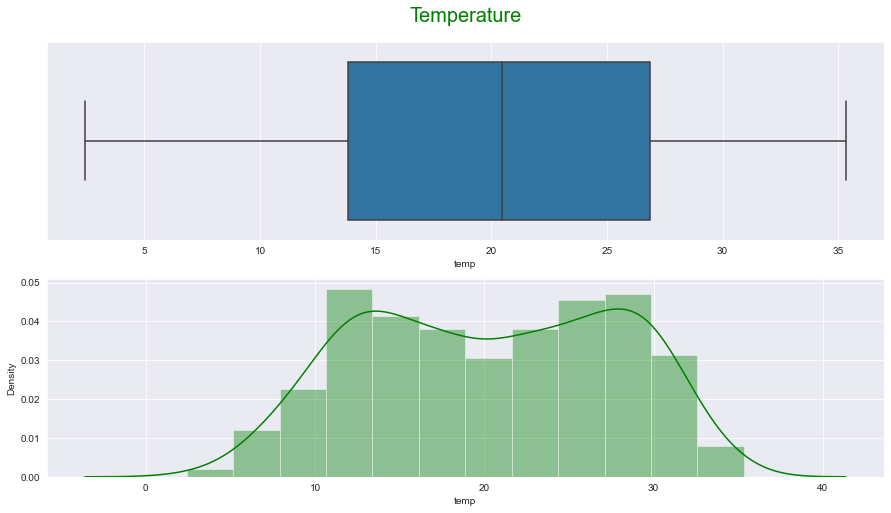

In [23]:
# TEMPERATURE COLUMN

plt.figure(figsize=[15,8])

sns.set_style('darkgrid')

plt.subplot(2,1,1)
sns.boxplot(df['temp']).set_title("Temperature", fontsize=20, color='Green', pad=20)

plt.subplot(2,1,2)
sns.distplot(df['temp'], color='g')

plt.show()

**`INFERENCE`** -
 - The temperature column values looks clear with valid range 

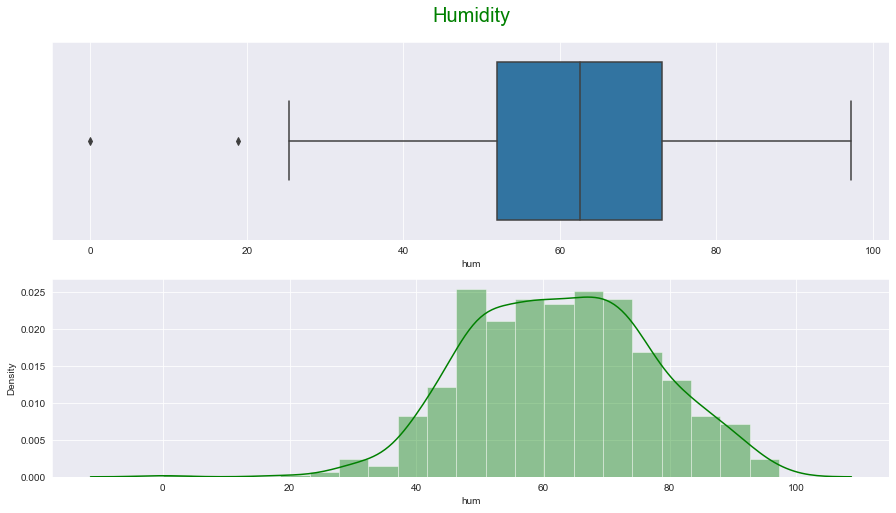

In [24]:
# HUMIDITY COLUMN

plt.figure(figsize=[15,8])

plt.subplot(2,1,1)
sns.boxplot(df['hum']).set_title("Humidity", fontsize=20, color='Green', pad=20)

plt.subplot(2,1,2)
sns.distplot(df['hum'], color='g')

plt.show()

**`INFERENCE`** -
 - Value zero is practically impossible, which could be a manual error, so we can impute with mean value
 - The temperature column, rest of the values looks clear with valid range 

In [25]:
#REPLACING ZERO WITH MEAN VALUE

df['hum']=df['hum'].replace(0,df.hum.mean())

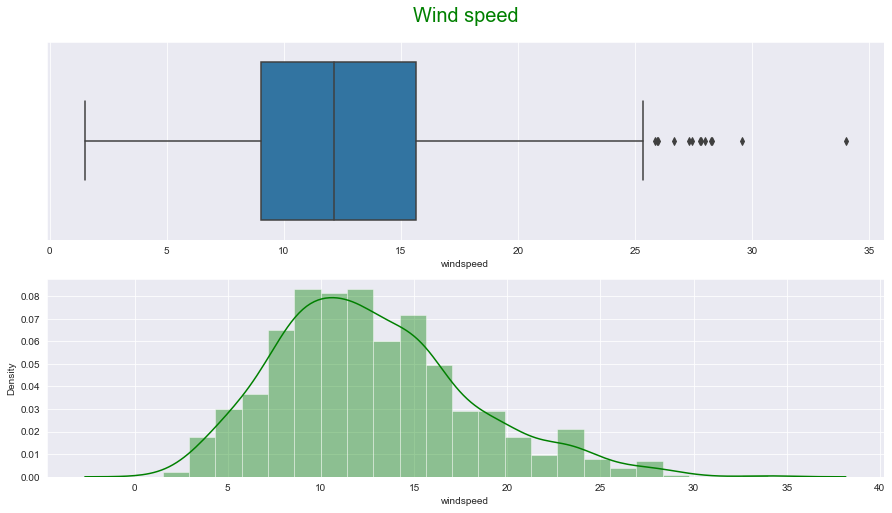

In [26]:
# WIND SPEED COLUMN

plt.figure(figsize=[15,8])

plt.subplot(2,1,1)
sns.boxplot(df['windspeed']).set_title("Wind speed", fontsize=20, color='Green', pad=20)

plt.subplot(2,1,2)
sns.distplot(df['windspeed'], color='g')

plt.show()

**`INFERENCE`** -
 - The wind speed column values looks clear with valid range 

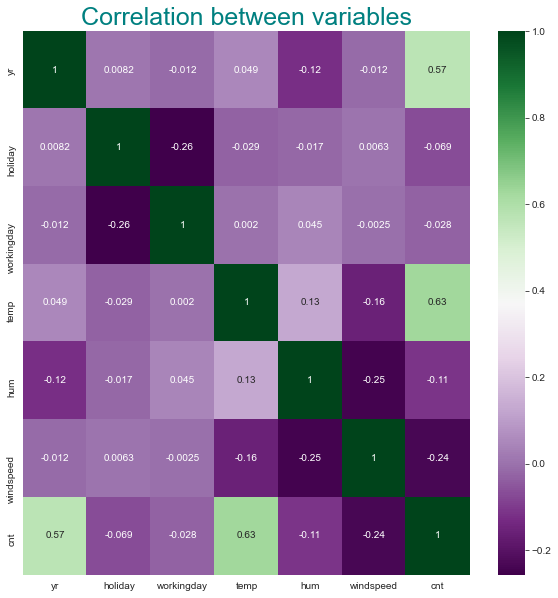

In [27]:
plt.figure(figsize=[10,10])

sns.heatmap(df.corr(),cmap = "PRGn" , annot=True).set_title('Correlation between variables', fontsize = 25, color='Teal')

plt.show()

**`INFERENCE`** -
 - There is no strong correlation (above 0.5) between independent variables

### CREATING DUMMIES

In [28]:
df = pd.get_dummies(df, drop_first=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 1 to 730
Data columns (total 29 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   yr                                             730 non-null    int64  
 1   holiday                                        730 non-null    int64  
 2   workingday                                     730 non-null    int64  
 3   temp                                           730 non-null    float64
 4   hum                                            730 non-null    float64
 5   windspeed                                      730 non-null    float64
 6   cnt                                            730 non-null    int64  
 7   season_spring                                  730 non-null    uint8  
 8   season_summer                                  730 non-null    uint8  
 9   season_winter                                  730 non

In [29]:
df.shape

(730, 29)

### (TRAIN & TEST) SPLITTING DATA 

In [30]:
# SPLITTING TRAIN DATA (70%) & TEST DATA (30%)

df_train, df_test = train_test_split(df, train_size=0.7, random_state=100)

In [31]:
# TRAIN DATAFRAME SHAPE

df_train.shape

(510, 29)

In [32]:
# TEST DATAFRAME SHAPE

df_test.shape

(220, 29)

In [33]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 577 to 521
Data columns (total 29 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   yr                                             510 non-null    int64  
 1   holiday                                        510 non-null    int64  
 2   workingday                                     510 non-null    int64  
 3   temp                                           510 non-null    float64
 4   hum                                            510 non-null    float64
 5   windspeed                                      510 non-null    float64
 6   cnt                                            510 non-null    int64  
 7   season_spring                                  510 non-null    uint8  
 8   season_summer                                  510 non-null    uint8  
 9   season_winter                                  510 n

##### Analysing trends between numeric vaiables

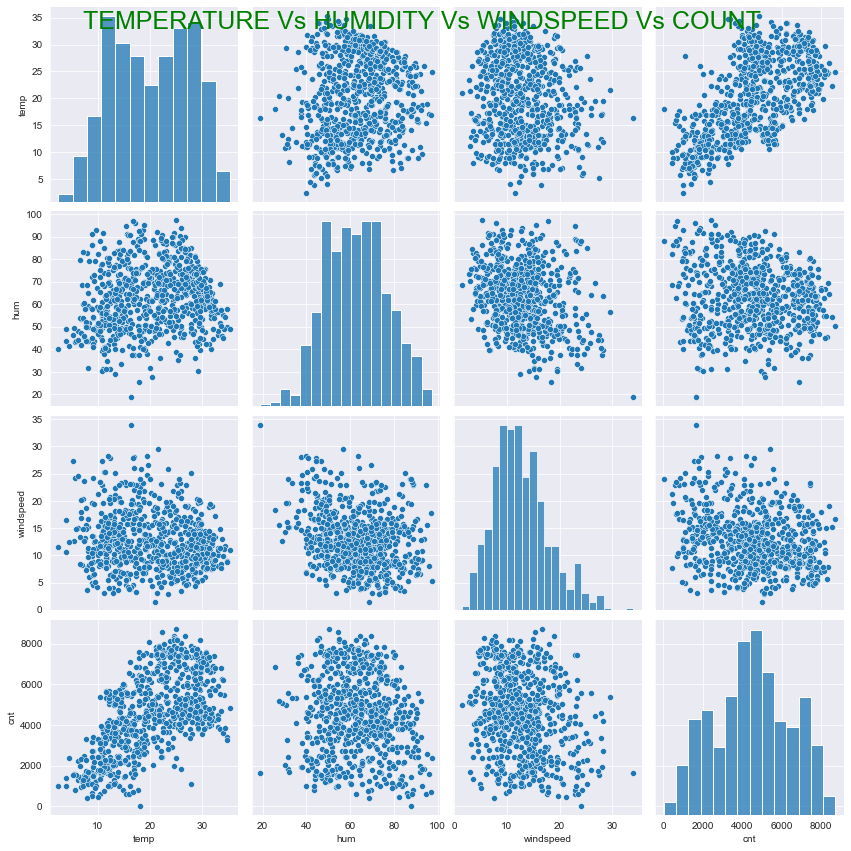

In [34]:
f = sns.pairplot(df[['temp', 'hum', 'windspeed','cnt']] , height = 3)
f.fig.suptitle('TEMPERATURE Vs HUMIDITY Vs WINDSPEED Vs COUNT ', fontsize = 25, color='Green')

plt.show()

**`INFERENCE`** -
 - Temperature and count has positive linear relationship

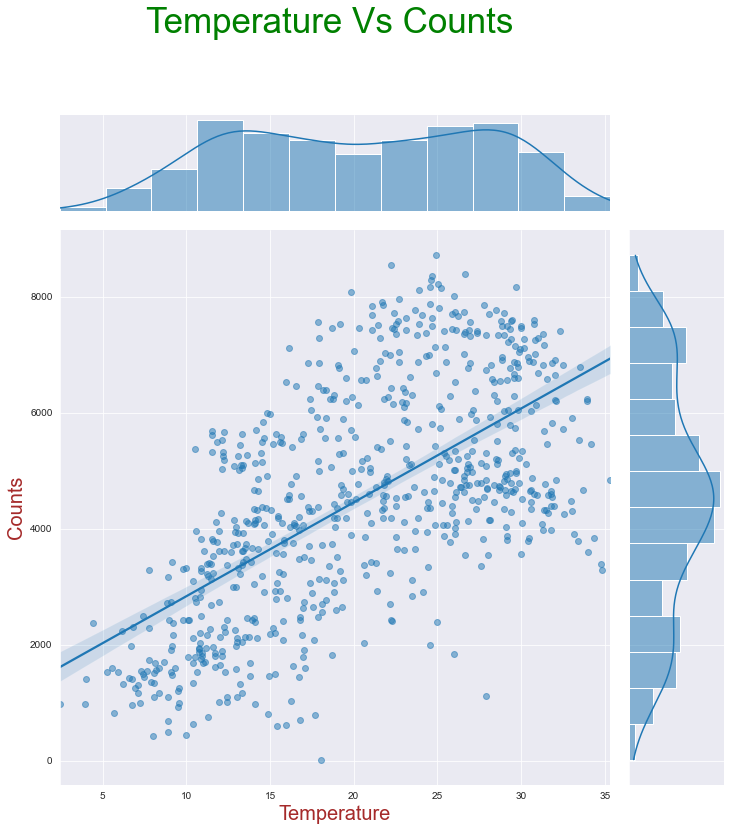

In [35]:
# Checking the correlation between temperature and count. 

sns.jointplot(df['temp'] , df['cnt'] , kind='reg',
              joint_kws = {'scatter_kws':dict(alpha=0.5)} , height=10)

plt.title("Temperature Vs Counts \n\n\n\n\n", 
          fontdict={'fontsize': 35, 'fontweight' : 5, 'color' : 'Green'})
plt.xlabel("Temperature", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel("Counts", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Brown'})

plt.show()

**`INFERENCE`** -
 - Temperature could be a good predictor of dependant variable

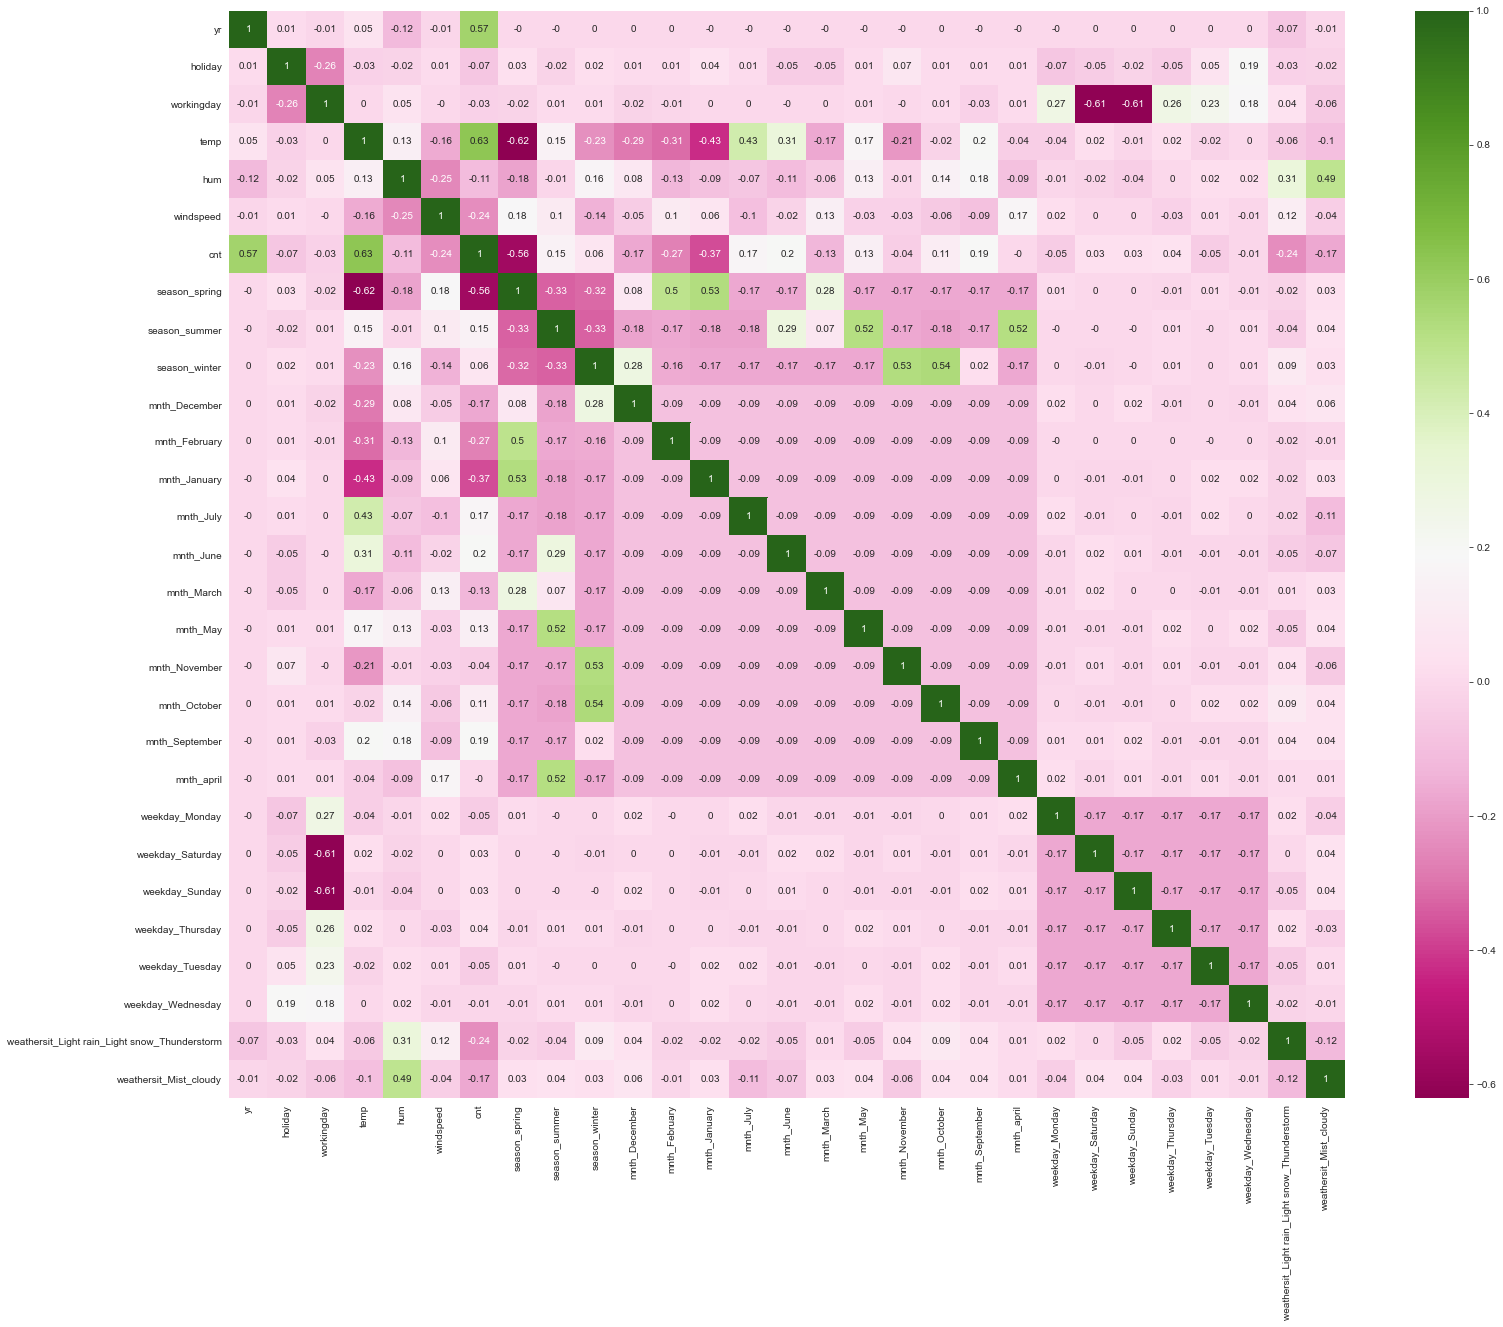

In [36]:
plt.figure(figsize = (25,20))
sns.heatmap(round(df.corr(),2), annot = True, cmap="PiYG")
plt.show()

**`INFERENCE`** -
 - This heat map will help us while checking for multicolinearity.

In [37]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 577 to 521
Data columns (total 29 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   yr                                             510 non-null    int64  
 1   holiday                                        510 non-null    int64  
 2   workingday                                     510 non-null    int64  
 3   temp                                           510 non-null    float64
 4   hum                                            510 non-null    float64
 5   windspeed                                      510 non-null    float64
 6   cnt                                            510 non-null    int64  
 7   season_spring                                  510 non-null    uint8  
 8   season_summer                                  510 non-null    uint8  
 9   season_winter                                  510 n

## NORMALISING DATA
##### ( MINMAX SCALING)

In [38]:
scaler = MinMaxScaler()
num_col = ['temp', 'hum', 'windspeed', 'cnt']
df_train[num_col] = scaler.fit_transform(df_train[num_col])
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_September,mnth_april,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light rain_Light snow_Thunderstorm,weathersit_Mist_cloudy
instant,,,,,,,,,,,,,,,,,,,,,
577,1,0,1,0.815169,0.659744,0.264686,0.827658,0,0,0,...,0,0,0,0,0,0,0,1,0,0
427,1,0,0,0.442393,0.553780,0.255342,0.465255,1,0,0,...,0,0,0,0,1,0,0,0,0,1
729,1,0,1,0.245101,0.377528,0.663106,0.204096,1,0,0,...,0,0,1,0,0,0,0,0,0,0
483,1,0,0,0.395666,0.385516,0.188475,0.482973,0,1,0,...,0,1,0,0,1,0,0,0,0,1
112,0,0,0,0.345824,0.692225,0.380981,0.191095,0,1,0,...,0,1,0,0,1,0,0,0,0,1


In [39]:
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_September,mnth_april,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light rain_Light snow_Thunderstorm,weathersit_Mist_cloudy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537440,0.568116,0.320883,0.513499,0.243137,0.247059,0.247059,...,0.080392,0.078431,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294,0.029412,0.345098
std,0.500429,0.157763,0.453386,0.225858,0.177295,0.169803,0.224421,0.429398,0.431725,0.431725,...,0.272166,0.269113,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373,0.169124,0.475867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.428913,0.199179,0.356420,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.570553,0.296763,0.518638,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.695953,0.414447,0.684710,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


##### CREATING TARGET VARIABLE AND PREDICTORS

In [40]:
#CREATING X AND Y FROM TRAIN DATA

y_train = df_train.pop('cnt')
X_train = df_train

In [41]:
X_train.head()

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_December,...,mnth_September,mnth_april,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light rain_Light snow_Thunderstorm,weathersit_Mist_cloudy
instant,,,,,,,,,,,,,,,,,,,,,
577,1,0,1,0.815169,0.659744,0.264686,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
427,1,0,0,0.442393,0.553780,0.255342,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
729,1,0,1,0.245101,0.377528,0.663106,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0
483,1,0,0,0.395666,0.385516,0.188475,0,1,0,0,...,0,1,0,0,1,0,0,0,0,1
112,0,0,0,0.345824,0.692225,0.380981,0,1,0,0,...,0,1,0,0,1,0,0,0,0,1


In [42]:
y_train.head()

instant
577    0.827658
427    0.465255
729    0.204096
483    0.482973
112    0.191095
Name: cnt, dtype: float64

In [43]:
X_train.shape

(510, 28)

## USING RECURSIVE FEATURE ELIMINATION (RFE) 
#### TO SELECT TOP 15 PREDICTOR VARIABLES 

In [44]:
# RUNNING RFE

lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, 15).fit(X_train, y_train)

In [45]:
# CHECKING SELECTED VARIABLES WITH THEIR RANKS

df_rfe = pd.DataFrame({'PREDICTORS': X_train.columns, 'SELECTED ': rfe.support_, 'RANKS': rfe.ranking_})
df_rfe.sort_values(by='RANKS')

,PREDICTORS,SELECTED,RANKS
0,yr,True,1
18,mnth_September,True,1
16,mnth_November,True,1
26,weathersit_Light rain_Light snow_Thunderstorm,True,1
12,mnth_July,True,1
11,mnth_January,True,1
9,mnth_December,True,1
8,season_winter,True,1
27,weathersit_Mist_cloudy,True,1
6,season_spring,True,1


In [46]:
# CREATING NEW X_TRAIN DATAFRAME BASED ON RFE RESULTS 

X_train_rfe = X_train[X_train.columns[rfe.support_]]

In [47]:
X_train_rfe.shape

(510, 15)

# MODEL BUILDING
##### USING STATSMODEL

### MODEL NUMBER - 1

In [48]:
# ADDING CONSTANT

X_train_sm = sm.add_constant(X_train_rfe)

# CREATING A NEW MODEL

lr_model_1 = sm.OLS(y_train, X_train_sm).fit()

#CHECKING SUMMARY

lr_model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.5
Date:                Fri, 04 Jun 2021   Prob (F-statistic):          7.47e-189
Time:                        20:21:55   Log-Likelihood:                 514.28
No. Observations:                 510   AIC:                            -996.6
Df Residuals:                     494   BIC:                            -928.8
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                             0.2900      0.033      8.713      0.000       0.225       0.355
yr                                                0.2298      0.008     28.358      0.000       0.214       0.246
holiday                                          -0.0911      0.026     -3.560      0.000      -0.141      -0.041
temp                                              0.4863      0.037     13.031      0.000       0.413       0.560
hum                                              -0.1401      0.032     -4.312      0.000      -0.204      -0.076
windspeed                                        -0.1910      0.026     -7.365      0.000      -0.242      -0.140
season_spring                                    -0.0584      0.021     -2.739      0.006      -0.100      -0.017
season_summer                                     0.0432      0.015      2.814      0.005       0.013       0.073
season_winter                                     0.1031      0.018      5.705      0.000       0.068       0.139
mnth_December                                    -0.0350      0.018     -1.994      0.047      -0.069      -0.001
mnth_January                                     -0.0440      0.018     -2.425      0.016      -0.080      -0.008
mnth_July                                        -0.0559      0.018     -3.062      0.002      -0.092      -0.020
mnth_November                                    -0.0383      0.019     -2.035      0.042      -0.075      -0.001
mnth_September                                    0.0758      0.017      4.484      0.000       0.043       0.109
weathersit_Light rain_Light snow_Thunderstorm    -0.2355      0.027     -8.566      0.000      -0.290      -0.182
weathersit_Mist_cloudy                           -0.0524      0.011     -4.898      0.000      -0.073      -0.031
==============================================================================
Omnibus:                       67.361   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              161.781
Skew:                          -0.690   Prob(JB):                     7.41e-36
Kurtosis:                       5.389   Cond. No.                         20.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### CHECKING VIF (variance inflation factor)

In [49]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,21.37
2,temp,14.27
4,windspeed,4.86
5,season_spring,3.84
7,season_winter,3.73
6,season_summer,2.60
14,weathersit_Mist_cloudy,2.49
0,yr,2.10
11,mnth_November,1.83
9,mnth_January,1.71


### **`INFERENCE`** -
 - P values for all the predictor variables are significant, below 0.05
 - Despite of having low P value, **Humidity** has **very high VIF**
 - To build a better model we can **drop** the **humidity** variable and built again a new model

In [50]:
# DROPPING HUMIDITY VARIABLE

X_train_rfe = X_train_rfe.drop(["hum"], axis = 1)

In [51]:
X_train_rfe.shape

(510, 14)

### MODEL NUMBER - 2

In [52]:
# ADDING CONSTANT

X_train_sm = sm.add_constant(X_train_rfe)

# CREATING A NEW MODEL

lr_model_2 = sm.OLS(y_train, X_train_sm).fit()

#CHECKING SUMMARY

lr_model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     184.5
Date:                Fri, 04 Jun 2021   Prob (F-statistic):          4.75e-186
Time:                        20:21:57   Log-Likelihood:                 504.85
No. Observations:                 510   AIC:                            -979.7
Df Residuals:                     495   BIC:                            -916.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                             0.2450      0.032      7.618      0.000       0.182       0.308
yr                                                0.2345      0.008     28.687      0.000       0.218       0.251
holiday                                          -0.0918      0.026     -3.522      0.000      -0.143      -0.041
temp                                              0.4387      0.036     12.093      0.000       0.367       0.510
windspeed                                        -0.1585      0.025     -6.276      0.000      -0.208      -0.109
season_spring                                    -0.0713      0.021     -3.314      0.001      -0.113      -0.029
season_summer                                     0.0349      0.015      2.251      0.025       0.004       0.065
season_winter                                     0.0869      0.018      4.831      0.000       0.052       0.122
mnth_December                                    -0.0428      0.018     -2.413      0.016      -0.078      -0.008
mnth_January                                     -0.0500      0.018     -2.719      0.007      -0.086      -0.014
mnth_July                                        -0.0500      0.019     -2.703      0.007      -0.086      -0.014
mnth_November                                    -0.0395      0.019     -2.064      0.040      -0.077      -0.002
mnth_September                                    0.0687      0.017      4.015      0.000       0.035       0.102
weathersit_Light rain_Light snow_Thunderstorm    -0.2917      0.025    -11.840      0.000      -0.340      -0.243
weathersit_Mist_cloudy                           -0.0801      0.009     -9.198      0.000      -0.097      -0.063
==============================================================================
Omnibus:                       69.242   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              171.476
Skew:                          -0.698   Prob(JB):                     5.81e-38
Kurtosis:                       5.473   Cond. No.                         18.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### CHECKING VIF (variance inflation factor)

In [53]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.17
3,windspeed,4.67
6,season_winter,2.95
4,season_spring,2.89
5,season_summer,2.24
0,yr,2.07
10,mnth_November,1.81
8,mnth_January,1.66
9,mnth_July,1.59
13,weathersit_Mist_cloudy,1.57


### **`INFERENCE`** -
 - P values for all the predictor variables are significant, below 0.05
 - As we saw earlier **temp is linearly correlated to the dependant variable**, so this can be a **better predictor** 
 - To build a better model we can **drop** the **windspeed** variable, as it is having **second highest VIF** and built again a new model

In [54]:
# DROPPING HUMIDITY VARIABLE

X_train_rfe = X_train_rfe.drop(["windspeed"], axis = 1)

In [55]:
X_train_rfe.shape

(510, 13)

### MODEL NUMBER - 3

In [56]:
# ADDING CONSTANT

X_train_sm = sm.add_constant(X_train_rfe)

# CREATING A NEW MODEL

lr_model_3 = sm.OLS(y_train, X_train_sm).fit()

#CHECKING SUMMARY

lr_model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     181.6
Date:                Fri, 04 Jun 2021   Prob (F-statistic):          5.35e-179
Time:                        20:22:00   Log-Likelihood:                 485.33
No. Observations:                 510   AIC:                            -942.7
Df Residuals:                     496   BIC:                            -883.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                             0.1837      0.032      5.775      0.000       0.121       0.246
yr                                                0.2332      0.008     27.496      0.000       0.217       0.250
holiday                                          -0.0941      0.027     -3.480      0.001      -0.147      -0.041
temp                                              0.4624      0.037     12.346      0.000       0.389       0.536
season_spring                                    -0.0830      0.022     -3.734      0.000      -0.127      -0.039
season_summer                                     0.0266      0.016      1.661      0.097      -0.005       0.058
season_winter                                     0.0902      0.019      4.834      0.000       0.054       0.127
mnth_December                                    -0.0332      0.018     -1.810      0.071      -0.069       0.003
mnth_January                                     -0.0333      0.019     -1.765      0.078      -0.070       0.004
mnth_July                                        -0.0512      0.019     -2.663      0.008      -0.089      -0.013
mnth_November                                    -0.0415      0.020     -2.091      0.037      -0.081      -0.003
mnth_September                                    0.0739      0.018      4.167      0.000       0.039       0.109
weathersit_Light rain_Light snow_Thunderstorm    -0.3060      0.025    -12.014      0.000      -0.356      -0.256
weathersit_Mist_cloudy                           -0.0787      0.009     -8.707      0.000      -0.096      -0.061
==============================================================================
Omnibus:                       76.508   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              206.076
Skew:                          -0.740   Prob(JB):                     1.78e-45
Kurtosis:                       5.740   Cond. No.                         18.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### CHECKING VIF (variance inflation factor)

In [57]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.30
5,season_winter,2.81
3,season_spring,2.12
0,yr,2.07
4,season_summer,1.94
9,mnth_November,1.79
7,mnth_January,1.65
8,mnth_July,1.59
12,weathersit_Mist_cloudy,1.56
6,mnth_December,1.47


### **`INFERENCE`** -
 - **season_summer** has **high P value**
 - To build a better model we can drop the **season_summer** variable and built again a new model

In [58]:
# DROPPING HUMIDITY VARIABLE

X_train_rfe = X_train_rfe.drop(["season_summer"], axis = 1)

In [59]:
X_train_rfe.shape

(510, 12)

### MODEL NUMBER - 4

In [60]:
# ADDING CONSTANT

X_train_sm = sm.add_constant(X_train_rfe)

# CREATING A NEW MODEL

lr_model_4 = sm.OLS(y_train, X_train_sm).fit()

#CHECKING SUMMARY

lr_model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     195.8
Date:                Fri, 04 Jun 2021   Prob (F-statistic):          1.47e-179
Time:                        20:22:01   Log-Likelihood:                 483.91
No. Observations:                 510   AIC:                            -941.8
Df Residuals:                     497   BIC:                            -886.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                             0.2196      0.023      9.390      0.000       0.174       0.266
yr                                                0.2337      0.008     27.520      0.000       0.217       0.250
holiday                                          -0.0935      0.027     -3.453      0.001      -0.147      -0.040
temp                                              0.4335      0.033     13.046      0.000       0.368       0.499
season_spring                                    -0.1084      0.016     -6.691      0.000      -0.140      -0.077
season_winter                                     0.0710      0.015      4.835      0.000       0.042       0.100
mnth_December                                    -0.0387      0.018     -2.139      0.033      -0.074      -0.003
mnth_January                                     -0.0381      0.019     -2.035      0.042      -0.075      -0.001
mnth_July                                        -0.0624      0.018     -3.465      0.001      -0.098      -0.027
mnth_November                                    -0.0472      0.020     -2.405      0.017      -0.086      -0.009
mnth_September                                    0.0621      0.016      3.814      0.000       0.030       0.094
weathersit_Light rain_Light snow_Thunderstorm    -0.3073      0.026    -12.048      0.000      -0.357      -0.257
weathersit_Mist_cloudy                           -0.0784      0.009     -8.670      0.000      -0.096      -0.061
==============================================================================
Omnibus:                       77.837   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              219.191
Skew:                          -0.738   Prob(JB):                     2.53e-48
Kurtosis:                       5.852   Cond. No.                         14.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### CHECKING VIF (variance inflation factor)

In [61]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,3.04
4,season_winter,2.53
0,yr,2.05
3,season_spring,1.93
8,mnth_November,1.79
6,mnth_January,1.65
11,weathersit_Mist_cloudy,1.53
5,mnth_December,1.46
7,mnth_July,1.34
9,mnth_September,1.20


### **`INFERENCE`** -
 - P values for all the predictor variables are significant, below 0.05
 - To build a better model we can drop the **season_winter** variable as it is having **second highest VIF** and built again a new model

In [62]:
# DROPPING HUMIDITY VARIABLE

X_train_rfe = X_train_rfe.drop(["season_winter"], axis = 1)

In [63]:
X_train_rfe.shape

(510, 11)

### MODEL NUMBER - 5

In [64]:
# ADDING CONSTANT

X_train_sm = sm.add_constant(X_train_rfe)

# CREATING A NEW MODEL

lr_model_5 = sm.OLS(y_train, X_train_sm).fit()

#CHECKING SUMMARY

lr_model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     202.3
Date:                Fri, 04 Jun 2021   Prob (F-statistic):          8.79e-176
Time:                        20:22:03   Log-Likelihood:                 472.19
No. Observations:                 510   AIC:                            -920.4
Df Residuals:                     498   BIC:                            -869.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                             0.2652      0.022     12.122      0.000       0.222       0.308
yr                                                0.2348      0.009     27.065      0.000       0.218       0.252
holiday                                          -0.0931      0.028     -3.361      0.001      -0.147      -0.039
temp                                              0.3831      0.032     11.878      0.000       0.320       0.446
season_spring                                    -0.1426      0.015     -9.580      0.000      -0.172      -0.113
mnth_December                                    -0.0084      0.017     -0.486      0.627      -0.042       0.026
mnth_January                                     -0.0394      0.019     -2.059      0.040      -0.077      -0.002
mnth_July                                        -0.0656      0.018     -3.564      0.000      -0.102      -0.029
mnth_November                                    -0.0031      0.018     -0.177      0.859      -0.038       0.032
mnth_September                                    0.0657      0.017      3.957      0.000       0.033       0.098
weathersit_Light rain_Light snow_Thunderstorm    -0.2942      0.026    -11.351      0.000      -0.345      -0.243
weathersit_Mist_cloudy                           -0.0782      0.009     -8.452      0.000      -0.096      -0.060
==============================================================================
Omnibus:                       59.247   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              139.926
Skew:                          -0.616   Prob(JB):                     4.13e-31
Kurtosis:                       5.251   Cond. No.                         13.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### CHECKING VIF (variance inflation factor)

In [65]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,2.95
0,yr,2.04
3,season_spring,1.82
5,mnth_January,1.63
10,weathersit_Mist_cloudy,1.51
6,mnth_July,1.31
8,mnth_September,1.20
7,mnth_November,1.11
4,mnth_December,1.09
1,holiday,1.06


### **`INFERENCE`** -
 - **mnth_November** has **very high P value**
 - To build a better model we can drop the **mnth_November** variable and built again a new model

In [66]:
# DROPPING HUMIDITY VARIABLE

X_train_rfe = X_train_rfe.drop(["mnth_November"], axis = 1)

In [67]:
X_train_rfe.shape

(510, 10)

### MODEL NUMBER - 6

In [68]:
# ADDING CONSTANT

X_train_sm = sm.add_constant(X_train_rfe)

# CREATING A NEW MODEL

lr_model_6 = sm.OLS(y_train, X_train_sm).fit()

#CHECKING SUMMARY

lr_model_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     223.0
Date:                Fri, 04 Jun 2021   Prob (F-statistic):          5.82e-177
Time:                        20:22:04   Log-Likelihood:                 472.18
No. Observations:                 510   AIC:                            -922.4
Df Residuals:                     499   BIC:                            -875.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                             0.2633      0.019     13.860      0.000       0.226       0.301
yr                                                0.2348      0.009     27.093      0.000       0.218       0.252
holiday                                          -0.0937      0.027     -3.420      0.001      -0.148      -0.040
temp                                              0.3855      0.029     13.201      0.000       0.328       0.443
season_spring                                    -0.1416      0.014    -10.240      0.000      -0.169      -0.114
mnth_December                                    -0.0076      0.017     -0.456      0.649      -0.040       0.025
mnth_January                                     -0.0389      0.019     -2.056      0.040      -0.076      -0.002
mnth_July                                        -0.0657      0.018     -3.580      0.000      -0.102      -0.030
mnth_September                                    0.0660      0.017      3.990      0.000       0.033       0.098
weathersit_Light rain_Light snow_Thunderstorm    -0.2941      0.026    -11.361      0.000      -0.345      -0.243
weathersit_Mist_cloudy                           -0.0781      0.009     -8.461      0.000      -0.096      -0.060
==============================================================================
Omnibus:                       59.016   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              139.301
Skew:                          -0.614   Prob(JB):                     5.64e-31
Kurtosis:                       5.247   Cond. No.                         11.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### CHECKING VIF (variance inflation factor)

In [69]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,2.92
0,yr,2.03
3,season_spring,1.80
5,mnth_January,1.63
9,weathersit_Mist_cloudy,1.50
6,mnth_July,1.30
7,mnth_September,1.19
4,mnth_December,1.09
1,holiday,1.03
8,weathersit_Light rain_Light snow_Thunderstorm,1.03


### **`INFERENCE`** -
 - **mnth_December** has **very high P value**
 - To build a better model we can drop the **mnth_December** variable and built again a new model

In [70]:
# DROPPING HUMIDITY VARIABLE

X_train_rfe = X_train_rfe.drop(["mnth_December"], axis = 1)

In [71]:
X_train_rfe.shape

(510, 9)

### MODEL NUMBER - 7

In [72]:
# ADDING CONSTANT

X_train_sm = sm.add_constant(X_train_rfe)

# CREATING A NEW MODEL

lr_model_7 = sm.OLS(y_train, X_train_sm).fit()

#CHECKING SUMMARY

lr_model_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     248.2
Date:                Fri, 04 Jun 2021   Prob (F-statistic):          3.98e-178
Time:                        20:22:06   Log-Likelihood:                 472.07
No. Observations:                 510   AIC:                            -924.1
Df Residuals:                     500   BIC:                            -881.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                             0.2600      0.018     14.820      0.000       0.226       0.294
yr                                                0.2348      0.009     27.115      0.000       0.218       0.252
holiday                                          -0.0935      0.027     -3.414      0.001      -0.147      -0.040
temp                                              0.3899      0.028     14.164      0.000       0.336       0.444
season_spring                                    -0.1411      0.014    -10.244      0.000      -0.168      -0.114
mnth_January                                     -0.0371      0.018     -2.006      0.045      -0.073      -0.001
mnth_July                                        -0.0663      0.018     -3.618      0.000      -0.102      -0.030
mnth_September                                    0.0662      0.017      4.006      0.000       0.034       0.099
weathersit_Light rain_Light snow_Thunderstorm    -0.2935      0.026    -11.361      0.000      -0.344      -0.243
weathersit_Mist_cloudy                           -0.0781      0.009     -8.465      0.000      -0.096      -0.060
==============================================================================
Omnibus:                       58.615   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              138.285
Skew:                          -0.610   Prob(JB):                     9.37e-31
Kurtosis:                       5.240   Cond. No.                         10.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### CHECKING VIF (variance inflation factor)

In [73]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,2.92
0,yr,2.02
3,season_spring,1.76
4,mnth_January,1.60
8,weathersit_Mist_cloudy,1.49
5,mnth_July,1.30
6,mnth_September,1.18
1,holiday,1.03
7,weathersit_Light rain_Light snow_Thunderstorm,1.03


### **`INFERENCE`** -
 - P values for all the predictor variables are significant, below 0.05
 - VIF values are around 2 or less, which are good values ( very low multicolinearity ).
 - None of the independent variable has coefficient value zero. 
 - Model has good R-squared and Adj. R-squared values.
 - F-statistic:	248.2
 - Prob (F-statistic):	3.98e-178, which is almost zero.
 - Model looks simple with less number of independent variables.

## FINAL MODEL

In [74]:
# COEFFICIENTS OF THE INDIPENDENT VARIABLES

lr_model_7.params

const                                            0.259993
yr                                               0.234782
holiday                                         -0.093480
temp                                             0.389932
season_spring                                   -0.141134
mnth_January                                    -0.037090
mnth_July                                       -0.066256
mnth_September                                   0.066174
weathersit_Light rain_Light snow_Thunderstorm   -0.293545
weathersit_Mist_cloudy                          -0.078067
dtype: float64

### **`INFERENCE`** -
 - B0 != B1 != B2 != B3 != B4 != B5 != B6 != B7 != B8 != B9 != 0
  - So we reject Null hypothesis (H0 : B1=B2=....Bn=0)
         

#### FINAL MODEL EQUATION

**`cnt = 0.259993 + (0.234782 * yr) + (-0.093480 * holiday) + ( 0.389932 * temp) + ( -0.141134 * season_spring) + (-0.037090 * mnth_January) + ( -0.066256 * mnth_July) + ( 0.066174 * mnth_September) + (-0.293545 * weathersit_Light rain_Light snow_Thunderstorm ) + ( -0.078067 * weathersit_Mist_cloudy )`**

# VALIDATING LINEAR REGRESSION ASSUMPTIONS

### RESIDUAL ANALYSIS OF TRAIN DATA

In [75]:
# CALCULATING Y_TRAIN_PRED AND RESIDUAL

y_train_pred = lr_model_7.predict(X_train_sm)
residual = y_train_pred - y_train

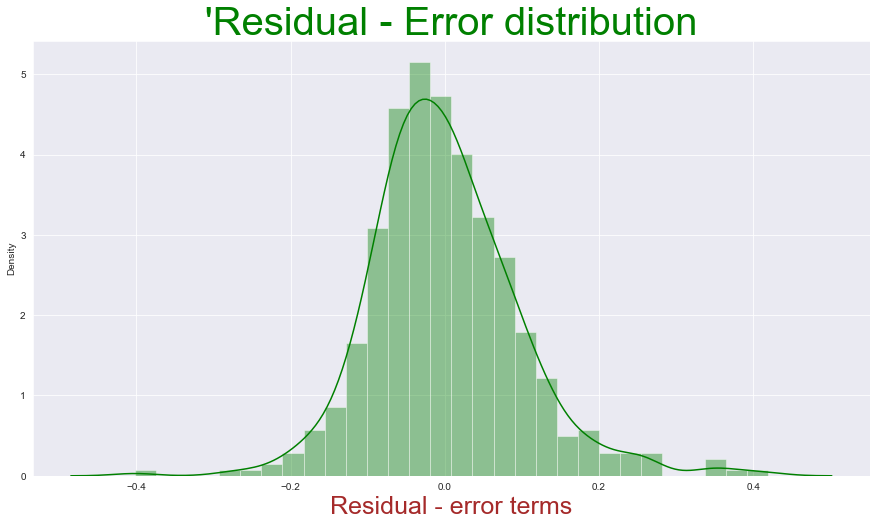

In [76]:
# PLOTTING RESIDUAL

plt.figure(figsize=[15,8])
sns.distplot(residual, color='g').set_title("'Residual - Error distribution", fontsize=40, color='Green')
plt.xlabel("Residual - error terms", fontdict={'fontsize': 25, 'fontweight' : 5, 'color' : 'Brown'})

plt.show()

### **`INFERENCE`** -
 - From the above graph it is evident that the errors terms are **normally distributed with mean zero**
 

### CHECKING FOR PATTERN 

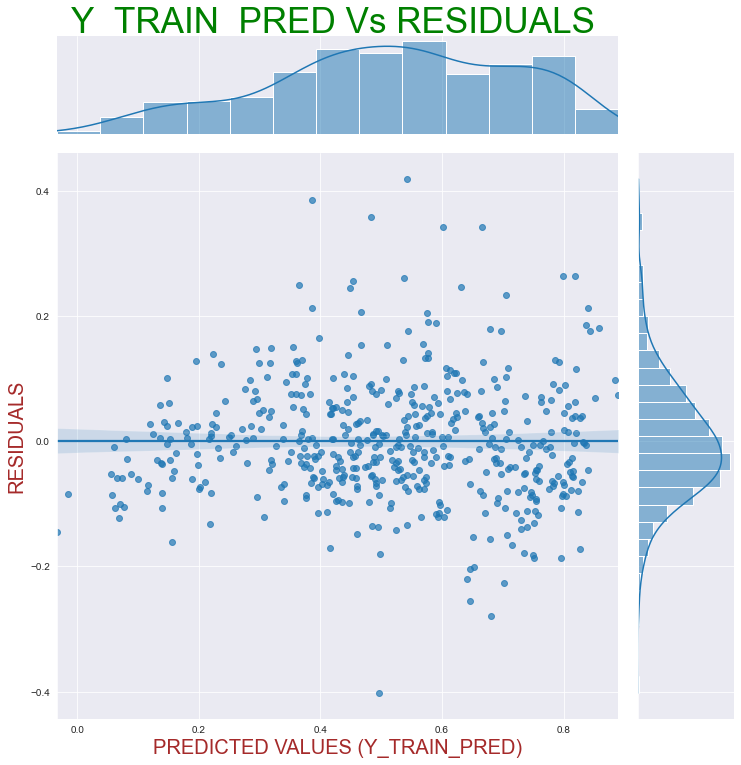

In [77]:
# PLOTTING Y_TRAIN_PRED VS RESIDUALS

sns.jointplot(y_train_pred,residual, kind='reg',joint_kws = {'scatter_kws':dict(alpha=0.7)}, height=10)

plt.title("Y_TRAIN_PRED Vs RESIDUALS \n\n\n", fontdict={'fontsize': 35, 'fontweight' : 5, 'color' : 'Green'})
plt.xlabel("PREDICTED VALUES (Y_TRAIN_PRED)", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel("RESIDUALS", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Brown'})

plt.show()

### **`INFERENCE`** -
 - Visible patterns are not found
 

### CHECKING FOR CONSTANT VARIANCE (HOMOSCEDASTICITY)

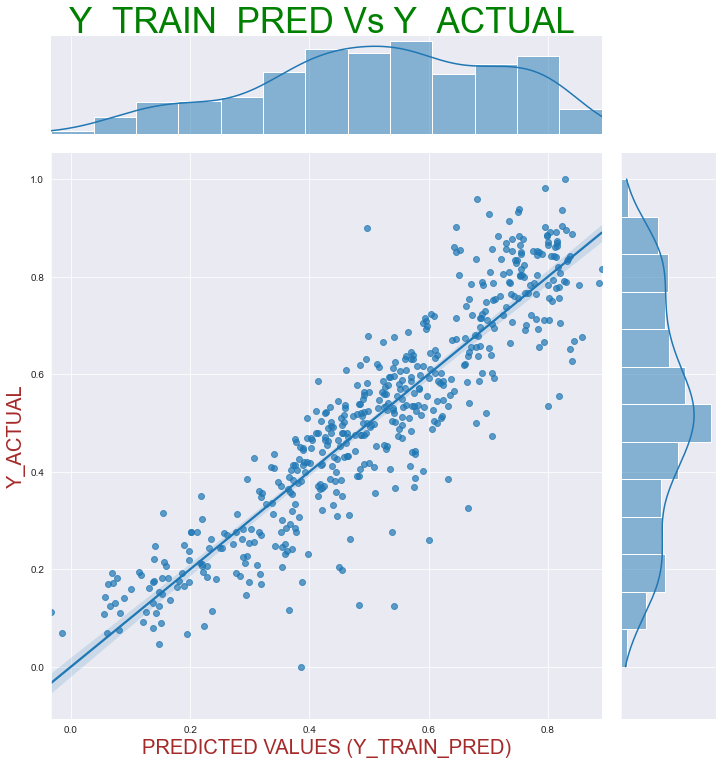

In [78]:
# PLOTTING Y_TRAIN_PRED VS Y_ACTUAL

sns.jointplot(y_train_pred,y_train, kind='reg',joint_kws = {'scatter_kws':dict(alpha=0.7)}, height=10)

plt.title("Y_TRAIN_PRED Vs Y_ACTUAL \n\n\n", fontdict={'fontsize': 35, 'fontweight' : 5, 'color' : 'Green'})
plt.xlabel("PREDICTED VALUES (Y_TRAIN_PRED)", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel("Y_ACTUAL", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Brown'})

plt.show()

### **`INFERENCE`** -
 - Actual points are equally distributed on both sides of the prediction
 - looks like it has uniform variance 

## FINAL MODEL PREDICTION ON TEST DATAFRAME

In [79]:
df_test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_September,mnth_april,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light rain_Light snow_Thunderstorm,weathersit_Mist_cloudy
instant,,,,,,,,,,,,,,,,,,,,,
185,0,1,0,29.793347,63.7917,5.459106,6043,0,0,0,...,0,0,0,0,0,0,0,1,0,1
536,1,0,1,32.082500,59.2083,7.625404,6211,0,1,0,...,0,0,0,0,0,1,0,0,0,0
300,0,0,0,19.270000,81.2917,13.250121,2659,0,0,1,...,0,0,0,1,0,0,0,0,0,1
222,0,0,1,31.433347,42.4167,13.417286,4780,0,0,0,...,0,0,0,0,0,0,0,0,0,0
153,0,0,0,29.315000,30.5000,19.583229,4968,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [80]:
#SCALING TEST DATAFRAME

df_test[num_col] = scaler.transform(df_test[num_col])
df_test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_September,mnth_april,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light rain_Light snow_Thunderstorm,weathersit_Mist_cloudy
instant,,,,,,,,,,,,,,,,,,,,,
185,0,1,0,0.831783,0.575080,0.084219,0.692706,0,0,0,...,0,0,0,0,0,0,0,1,0,1
536,1,0,1,0.901354,0.516506,0.153728,0.712034,0,1,0,...,0,0,0,0,0,1,0,0,0,0
300,0,0,0,0.511964,0.798722,0.334206,0.303382,0,0,1,...,0,0,0,1,0,0,0,0,0,1
222,0,0,1,0.881625,0.301917,0.339570,0.547400,0,0,0,...,0,0,0,0,0,0,0,0,0,0
153,0,0,0,0.817246,0.149627,0.537414,0.569029,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [81]:
df_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_September,mnth_april,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light rain_Light snow_Thunderstorm,weathersit_Mist_cloudy
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.640909,0.558718,0.551340,0.313293,0.522154,0.254545,0.263636,0.236364,...,0.086364,0.090909,0.118182,0.172727,0.154545,0.140909,0.122727,0.159091,0.027273,0.318182
std,0.500809,0.187620,0.480828,0.233187,0.184403,0.159584,0.219163,0.436599,0.441609,0.425817,...,0.281541,0.288135,0.323559,0.378873,0.362295,0.348721,0.328872,0.366595,0.163248,0.466833
min,0.000000,0.000000,0.000000,0.046591,0.084665,-0.042808,0.048205,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.416134,0.198843,0.378595,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.535676,0.300126,0.524678,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.682271,0.402718,0.677750,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,1.002662,0.807474,0.963300,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


##### CREATING TARGET VARIABLE AND PREDICTORS

In [82]:
#CREATING X AND Y FROM TEST DATA

y_test = df_test.pop('cnt')
X_test = df_test

X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 185 to 654
Data columns (total 28 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   yr                                             220 non-null    int64  
 1   holiday                                        220 non-null    int64  
 2   workingday                                     220 non-null    int64  
 3   temp                                           220 non-null    float64
 4   hum                                            220 non-null    float64
 5   windspeed                                      220 non-null    float64
 6   season_spring                                  220 non-null    uint8  
 7   season_summer                                  220 non-null    uint8  
 8   season_winter                                  220 non-null    uint8  
 9   mnth_December                                  220 n

##### SELECTING THE COLUMNS OF OUR FINAL MODEL ON TEST DATAFRAME

In [83]:
X_test = X_test[X_train_rfe.columns]

##### ADDING CONSTANT AND MAKING PREDICTIONS

In [84]:
# ADDING CONSTANT

X_test = sm.add_constant(X_test)

#Y_PRED

y_pred = lr_model_7.predict(X_test)

### MODEL EVALUATION (TEST DATA VS PREDICTED DATA)

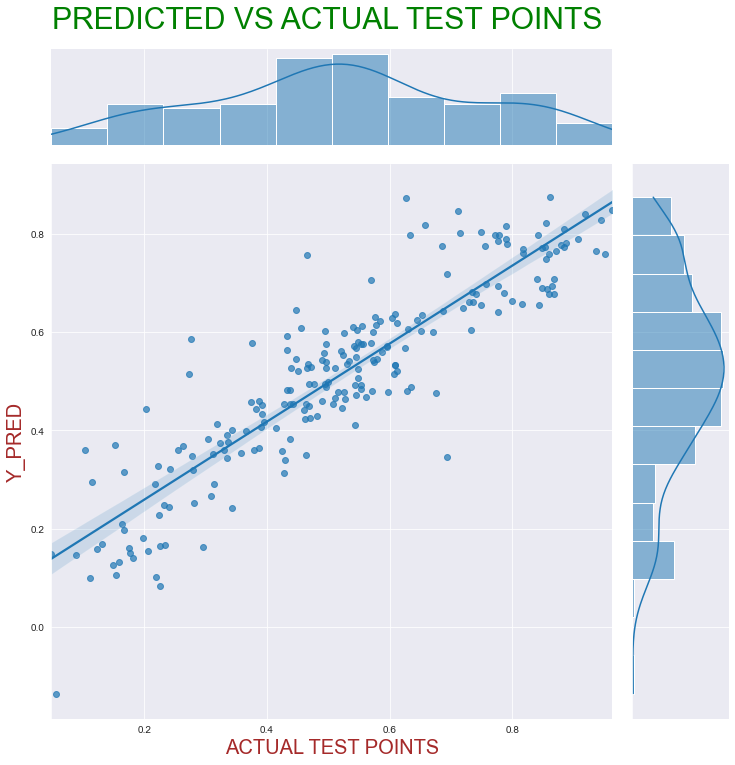

In [85]:
# PLOTTING PREDICTED TEST POINTS VS ACTUAL TEST POINTS

sns.jointplot(y_test,y_pred, kind='reg',joint_kws = {'scatter_kws':dict(alpha=0.7)}, height=10)

plt.title("PREDICTED VS ACTUAL TEST POINTS \n\n\n\n", fontdict={'fontsize': 30, 'fontweight' : 5, 'color' : 'Green'})
plt.xlabel("ACTUAL TEST POINTS", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel("Y_PRED", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Brown'})

plt.show()

### **`INFERENCE`** -
 - Linear relationship between y_pred and test actual points are clearly visible
 - Our final model (lr_model_7) seems to be good enough.

### R-SQUARE VALUE (TEST)

In [86]:
r_squared = r2_score(y_test, y_pred)
r_squared

0.8022849877587971

### ADJUSTED R-SQUARE VALUE (TEST)

In [87]:
n = X_test.shape[0]
p = X_test.shape[1]

adjusted_r2 = 1-((1-r_squared)*(n-1)/(n-p-1))
adjusted_r2

0.7928249393262037

### MEAN SQUARED ERROR

In [88]:
np.sqrt(mean_squared_error(y_test, y_pred))

0.09722962952784847

### COMPARISION (TRAIN VS TEST)

 - **`TRAIN`** 
  - R-squared:       0.817 
  - Adj. R-squared:  0.814
 - **`TEST`** 
  - R-squared:        0.802
  - Adj. R-squared:   0.793

# CONCLUSION:

#### FINAL MODEL EQUATION

**`cnt = 0.259993 + ( 0.234782 * yr ) + ( -0.093480 * holiday ) + ( 0.389932 * temp ) + ( -0.141134 * season_spring ) + (-0.037090 * mnth_January ) + ( -0.066256 * mnth_July ) + ( 0.066174 * mnth_September ) + ( -0.293545 * weathersit_Light rain_Light snow_Thunderstorm ) + ( -0.078067 * weathersit_Mist_cloudy )`**

 - **temp has the highest coefficient of 0.389932**, which means keeping other variable constant an unit increase in temp results in 0.389932 unit increase in cnt 
 - temp and weathersit_Light rain_Light snow_Thunderstorm are the top 2 variables having strong coefficients
 - **holiday, spring, january, july and both weather situation variables have negative coeeficient**, which means increase in values of  these variables would result in decrease in value of cnt.
 - Dependant variable (cnt) increases if temperature, year, month_september increases as these variables have positive coefficients.
 - Constant value - when all other variables are zero the cnt value will still be 0.259993
 - Comparing R-squared value for both train and test. Our model performs well on test set as well.
 - This model explains how exactly the demands vary with different features. management can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations.